# Julia for Data Analysis

## Bogumił Kamiński

# Lecture 12. Mutating and transforming data frames

## Getting and loading the GitHub developers data set

### Fetching GitHub developer data from the web

In [ ]:
using Pkg
Pkg.activate(Base.current_project())

In [1]:
import Downloads
using SHA
git_zip = "git_web_ml.zip"

"git_web_ml.zip"

In [2]:
if !isfile(git_zip)
    Downloads.download("https://snap.stanford.edu/data/git_web_ml.zip", git_zip)
end

isfile(git_zip)

true

In [3]:
open(sha256, git_zip) == [0x56, 0xc0, 0xc1, 0xc2, 0xc4, 0x60, 0xdc, 0x4c,
                          0x7b, 0xf8, 0x93, 0x57, 0xb1, 0xfe, 0xc0, 0x20,
                          0xf4, 0x5e, 0x2e, 0xce, 0xba, 0xb8, 0x1d, 0x13,
                          0x1d, 0x07, 0x3b, 0x10, 0xe2, 0x8e, 0xc0, 0x31]

true

### Implementing a function that extracts data from a ZIP file

In [4]:
import ZipFile
git_archive = ZipFile.Reader(git_zip)

ZipFile.Reader for IOStream(<file git_web_ml.zip>) containing 6 files:

uncompressedsize method  mtime            name
----------------------------------------------
               0 Store   2019-10-03 21-49 git_web_ml/
         3306139 Deflate 2019-09-20 22-39 git_web_ml/musae_git_edges.csv
         4380176 Deflate 2019-09-20 22-39 git_web_ml/musae_git_features.json
          676528 Deflate 2019-09-20 22-39 git_web_ml/musae_git_target.csv
             485 Deflate 2019-10-03 21-44 git_web_ml/citing.txt
             881 Deflate 2019-10-03 21-49 git_web_ml/README.txt


In [5]:
git_archive.files

6-element Vector{ZipFile.ReadableFile}:
 ZipFile.ReadableFile(name=git_web_ml/, method=Store, uncompresssedsize=0, compressedsize=0, mtime=1.57013214e9)
 ZipFile.ReadableFile(name=git_web_ml/musae_git_edges.csv, method=Deflate, uncompresssedsize=3306139, compressedsize=1089598, mtime=1.569011984e9)
 ZipFile.ReadableFile(name=git_web_ml/musae_git_features.json, method=Deflate, uncompresssedsize=4380176, compressedsize=961155, mtime=1.569011984e9)
 ZipFile.ReadableFile(name=git_web_ml/musae_git_target.csv, method=Deflate, uncompresssedsize=676528, compressedsize=343259, mtime=1.569011984e9)
 ZipFile.ReadableFile(name=git_web_ml/citing.txt, method=Deflate, uncompresssedsize=485, compressedsize=302, mtime=1.57013188e9)
 ZipFile.ReadableFile(name=git_web_ml/README.txt, method=Deflate, uncompresssedsize=881, compressedsize=479, mtime=1.57013214e9)

In [6]:
git_archive.files[2].name

"git_web_ml/musae_git_edges.csv"

In [7]:
function ingest_to_df(archive::ZipFile.Reader, filename::AbstractString)
    idx = only(findall(x -> x.name == filename, archive.files))
    return CSV.read(read(archive.files[idx]), DataFrame)
end

ingest_to_df (generic function with 1 method)

In [8]:
findall(x -> x.name == "git_web_ml/musae_git_edges.csv", git_archive.files)

1-element Vector{Int64}:
 2

In [9]:
findall(x -> x.name == "", git_archive.files)

Int64[]

In [10]:
only(findall(x -> x.name == "git_web_ml/musae_git_edges.csv", git_archive.files))

2

In [11]:
only(findall(x -> x.name == "", git_archive.files))

LoadError: ArgumentError: Collection is empty, must contain exactly 1 element

### Reading the GitHub developer data into a data frame

In [12]:
using CSV
using DataFrames
edges_df = ingest_to_df(git_archive, "git_web_ml/musae_git_edges.csv");
classes_df = ingest_to_df(git_archive, "git_web_ml/musae_git_target.csv");
close(git_archive)

In [13]:
summary(edges_df)

"289003×2 DataFrame"

In [14]:
edges_df

289003×2 DataFrame
    Row │ id_1   id_2  
        │ Int64  Int64 
────────┼──────────────
      1 │     0  23977
      2 │     1  34526
      3 │     1   2370
      4 │     1  14683
      5 │     1  29982
      6 │     1  21142
      7 │     1  20363
      8 │     1  23830
      9 │     1  34035
     10 │  6067  19720
     11 │  6067  20183
   ⋮    │   ⋮      ⋮
 288994 │ 37494  37577
 288995 │ 37495  18377
 288996 │ 31255  37602
 288997 │ 37519  37678
 288998 │ 19093   2347
 288999 │ 37527  37596
 289000 │ 37529  37601
 289001 │ 37644   2347
 289002 │ 25879   2347
 289003 │ 25616   2347
    288982 rows omitted

In [15]:
describe(edges_df, :min, :max, :mean, :nmissing, :eltype)

2×6 DataFrame
 Row │ variable  min    max    mean     nmissing  eltype   
     │ Symbol    Int64  Int64  Float64  Int64     DataType 
─────┼─────────────────────────────────────────────────────
   1 │ id_1          0  37694  14812.6         0  Int64
   2 │ id_2         16  37699  23778.8         0  Int64

In [16]:
summary(classes_df)

"37700×3 DataFrame"

In [17]:
classes_df

37700×3 DataFrame
   Row │ id     name               ml_target 
       │ Int64  String31           Int64     
───────┼─────────────────────────────────────
     1 │     0  Eiryyy                     0
     2 │     1  shawflying                 0
     3 │     2  JpMCarrilho                1
     4 │     3  SuhwanCha                  0
     5 │     4  sunilangadi2               1
     6 │     5  j6montoya                  0
     7 │     6  sfate                      0
     8 │     7  amituuush                  0
     9 │     8  mauroherlein               0
    10 │     9  ParadoxZero                0
    11 │    10  llazzaro                   0
   ⋮   │   ⋮            ⋮              ⋮
 37691 │ 37690  tbranyen                   0
 37692 │ 37691  bblu                       0
 37693 │ 37692  mubaris                    0
 37694 │ 37693  chengzhongkai              1
 37695 │ 37694  alFReD-NSH                 0
 37696 │ 37695  shawnwanderson             1
 37697 │ 37696  kris-ipeh                  0
 37698 │ 37697  qpautrat                   0
 37699 │ 37698  Injabie3                   1
 37700 │ 37699  caseycavanagh              0
                           37679 rows omitted

In [18]:
describe(classes_df, :min, :max, :mean, :nmissing, :eltype)

3×6 DataFrame
 Row │ variable   min            max      mean      nmissing  eltype   
     │ Symbol     Any            Any      Union…    Int64     DataType 
─────┼─────────────────────────────────────────────────────────────────
   1 │ id         0              37699    18849.5          0  Int64
   2 │ name       007arunwilson  timqian                   0  String31
   3 │ ml_target  0              1        0.258329         0  Int64

In [19]:
findall(n -> n == "bkamins", classes_df.name)

Int64[]

In [20]:
findall(n -> n == "StefanKarpinski", classes_df.name)

1-element Vector{Int64}:
 1359

In [21]:
classes_df[findall(n -> n == "StefanKarpinski", classes_df.name), :]

1×3 DataFrame
 Row │ id     name             ml_target 
     │ Int64  String31         Int64     
─────┼───────────────────────────────────
   1 │  1358  StefanKarpinski          1

In [22]:
edges_df .+= 1

289003×2 DataFrame
    Row │ id_1   id_2  
        │ Int64  Int64 
────────┼──────────────
      1 │     1  23978
      2 │     2  34527
      3 │     2   2371
      4 │     2  14684
      5 │     2  29983
      6 │     2  21143
      7 │     2  20364
      8 │     2  23831
      9 │     2  34036
     10 │  6068  19721
     11 │  6068  20184
   ⋮    │   ⋮      ⋮
 288994 │ 37495  37578
 288995 │ 37496  18378
 288996 │ 31256  37603
 288997 │ 37520  37679
 288998 │ 19094   2348
 288999 │ 37528  37597
 289000 │ 37530  37602
 289001 │ 37645   2348
 289002 │ 25880   2348
 289003 │ 25617   2348
    288982 rows omitted

### Transforming a data frame using broadcasting

In [23]:
classes_df.id .+= 1

37700-element Vector{Int64}:
     1
     2
     3
     4
     5
     6
     7
     8
     9
    10
    11
    12
    13
     ⋮
 37689
 37690
 37691
 37692
 37693
 37694
 37695
 37696
 37697
 37698
 37699
 37700

In [24]:
df = DataFrame(a=1:3, b=[4, missing, 5])

3×2 DataFrame
 Row │ a      b       
     │ Int64  Int64?  
─────┼────────────────
   1 │     1        4
   2 │     2  missing 
   3 │     3        5

In [25]:
df .^ 2

3×2 DataFrame
 Row │ a      b       
     │ Int64  Int64?  
─────┼────────────────
   1 │     1       16
   2 │     4  missing 
   3 │     9       25

In [26]:
coalesce.(df, 0)

3×2 DataFrame
 Row │ a      b     
     │ Int64  Int64 
─────┼──────────────
   1 │     1      4
   2 │     2      0
   3 │     3      5

In [27]:
df .+ [10, 11, 12]

3×2 DataFrame
 Row │ a      b       
     │ Int64  Int64?  
─────┼────────────────
   1 │    11       14
   2 │    13  missing 
   3 │    15       17

In [28]:
classes_df.id == axes(classes_df, 1)

true

In [29]:
df = DataFrame(a=1:3, b=1:3)

3×2 DataFrame
 Row │ a      b     
     │ Int64  Int64 
─────┼──────────────
   1 │     1      1
   2 │     2      2
   3 │     3      3

In [30]:
df[!, :a] .= "x"

3-element Vector{String}:
 "x"
 "x"
 "x"

In [31]:
df[:, :b] .= "x"

LoadError: MethodError: [0mCannot `convert` an object of type [92mString[39m[0m to an object of type [91mInt64[39m
[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::Base.TwicePrecision[39m) where T<:Number at C:\WORK\julia-1.7.3\share\julia\base\twiceprecision.jl:262
[0m  convert(::Type{T}, [91m::AbstractChar[39m) where T<:Number at C:\WORK\julia-1.7.3\share\julia\base\char.jl:185
[0m  convert(::Type{T}, [91m::CartesianIndex{1}[39m) where T<:Number at C:\WORK\julia-1.7.3\share\julia\base\multidimensional.jl:136
[0m  ...

In [32]:
df

3×2 DataFrame
 Row │ a       b     
     │ String  Int64 
─────┼───────────────
   1 │ x           1
   2 │ x           2
   3 │ x           3

In [33]:
df = DataFrame(a=1:3, b=1:3, c=1:3)

3×3 DataFrame
 Row │ a      b      c     
     │ Int64  Int64  Int64 
─────┼─────────────────────
   1 │     1      1      1
   2 │     2      2      2
   3 │     3      3      3

In [34]:
df[!, :a] = ["x", "y", "z"]

3-element Vector{String}:
 "x"
 "y"
 "z"

In [35]:
df[:, :b] = ["x", "y", "z"]

LoadError: MethodError: [0mCannot `convert` an object of type [92mString[39m[0m to an object of type [91mInt64[39m
[0mClosest candidates are:
[0m  convert(::Type{T}, [91m::Base.TwicePrecision[39m) where T<:Number at C:\WORK\julia-1.7.3\share\julia\base\twiceprecision.jl:262
[0m  convert(::Type{T}, [91m::AbstractChar[39m) where T<:Number at C:\WORK\julia-1.7.3\share\julia\base\char.jl:185
[0m  convert(::Type{T}, [91m::CartesianIndex{1}[39m) where T<:Number at C:\WORK\julia-1.7.3\share\julia\base\multidimensional.jl:136
[0m  ...

In [36]:
df[:, :c] = [11, 12, 13]

3-element Vector{Int64}:
 11
 12
 13

In [37]:
df

3×3 DataFrame
 Row │ a       b      c     
     │ String  Int64  Int64 
─────┼──────────────────────
   1 │ x           1     11
   2 │ y           2     12
   3 │ z           3     13

## Computing additional node features

### Creating a SimpleGraph object

In [38]:
using Graphs
gh = SimpleGraph(nrow(classes_df))

{37700, 0} undirected simple Int64 graph

In [39]:
for (srt, dst) in eachrow(edges_df)
    add_edge!(gh, srt, dst)
end

In [40]:
gh

{37700, 289003} undirected simple Int64 graph

In [41]:
ne(gh)

289003

In [42]:
nv(gh)

37700

In [43]:
mat = [1 2; 3 4; 5 6]

3×2 Matrix{Int64}:
 1  2
 3  4
 5  6

In [44]:
for (x1, x2) in eachrow(mat)
    @show x1, x2
end

(x1, x2) = (1, 2)
(x1, x2) = (3, 4)
(x1, x2) = (5, 6)


### Computing features of nodes using the Graphs.jl package

In [45]:
degree(gh)

37700-element Vector{Int64}:
   1
   8
   1
   5
   2
   1
   6
   8
   8
   7
  66
   2
   6
   ⋮
   8
   9
 215
   3
  58
   4
  20
   1
   2
   4
   3
   4

In [46]:
classes_df.deg = degree(gh)

37700-element Vector{Int64}:
   1
   8
   1
   5
   2
   1
   6
   8
   8
   7
  66
   2
   6
   ⋮
   8
   9
 215
   3
  58
   4
  20
   1
   2
   4
   3
   4

In [47]:
df = DataFrame()

0×0 DataFrame

In [48]:
x = [1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [49]:
df[!, :x1] = x

3-element Vector{Int64}:
 1
 2
 3

In [50]:
df[:, :x2] = x

3-element Vector{Int64}:
 1
 2
 3

In [51]:
df

3×2 DataFrame
 Row │ x1     x2    
     │ Int64  Int64 
─────┼──────────────
   1 │     1      1
   2 │     2      2
   3 │     3      3

In [52]:
df.x1 === x

true

In [53]:
df.x2 === x

false

In [54]:
df.x2 == x

true

In [55]:
df.x3 .= 1

3-element Vector{Int64}:
 1
 1
 1

In [56]:
df

3×3 DataFrame
 Row │ x1     x2     x3    
     │ Int64  Int64  Int64 
─────┼─────────────────────
   1 │     1      1      1
   2 │     2      2      1
   3 │     3      3      1

### Counting number of web and machine learning neighbors of a node

In [57]:
edges(gh)

SimpleEdgeIter 289003

In [58]:
e1 = first(edges(gh))

Edge 1 => 23978

In [59]:
dump(e1)

Graphs.SimpleGraphs.SimpleEdge{Int64}
  src: Int64 1
  dst: Int64 23978


In [60]:
e1.src

1

In [61]:
e1.dst

23978

### Defining a function counting neighbors of a node

In [62]:
function deg_class(gh, class)
    deg_ml = zeros(Int, length(class)) #A
    deg_web = zeros(Int, length(class)) #A
    for edge in edges(gh) #B
        a, b = edge.src, edge.dst #C
        if class[b] == 1 #D
            deg_ml[a] += 1 #D
        else
            deg_web[a] += 1 #D
        end
        if class[a] == 1 #E
            deg_ml[b] += 1 #E
        else
            deg_web[b] += 1 #E
        end
    end
    return (deg_ml, deg_web)
end

deg_class (generic function with 1 method)

In [63]:
classes_df.deg_ml, classes_df.deg_web = deg_class(gh, classes_df.ml_target)

([0, 0, 0, 3, 1, 0, 0, 0, 1, 2  …  2, 0, 12, 1, 0, 1, 0, 0, 1, 0], [1, 8, 1, 2, 1, 1, 6, 8, 7, 5  …  213, 3, 46, 3, 20, 0, 2, 4, 2, 4])

In [64]:
@time deg_class(gh, classes_df.ml_target);

  0.005215 seconds (5 allocations: 589.250 KiB)


In [65]:
@code_warntype deg_class(gh, classes_df.ml_target)

MethodInstance for deg_class(::SimpleGraph{Int64}, ::Vector{Int64})
  from deg_class(gh, class) in Main at In[62]:1
Arguments
  #self#::Core.Const(deg_class)
  gh::SimpleGraph{Int64}
  class::Vector{Int64}
Locals
  @_4::Union{Nothing, Tuple{Graphs.SimpleGraphs.SimpleEdge{Int64}, Tuple{Int64, Int64}}}
  deg_web::Vector{Int64}
  deg_ml::Vector{Int64}
  edge::Graphs.SimpleGraphs.SimpleEdge{Int64}
  b::Int64
  a::Int64
Body::Tuple{Vector{Int64}, Vector{Int64}}
1 ── %1  = Main.length(class)::Int64
│          (deg_ml = Main.zeros(Main.Int, %1))
│    %3  = Main.length(class)::Int64
│          (deg_web = Main.zeros(Main.Int, %3))
│    %5  = Main.edges(gh)::Graphs.SimpleGraphs.SimpleEdgeIter{SimpleGraph{Int64}}
│          (@_4 = Base.iterate(%5))
│    %7  = (@_4 === nothing)::Bool
│    %8  = Base.not_int(%7)::Bool
└───       goto #10 if not %8
2 ┄─ %10 = @_4::Tuple{Graphs.SimpleGraphs.SimpleEdge{Int64}, Tuple{Int64, Int64}}
│          (edge = Core.getfield(%10, 1))
│    %12 = Core.getfield(%10,

### Interpreting the results of the analysis

In [66]:
describe(classes_df, :min, :max, :mean, :std)

6×5 DataFrame
 Row │ variable   min            max      mean      std      
     │ Symbol     Any            Any      Union…    Union…   
─────┼───────────────────────────────────────────────────────
   1 │ id         1              37700    18850.5   10883.2
   2 │ name       007arunwilson  timqian                     
   3 │ ml_target  0              1        0.258329  0.437722
   4 │ deg        1              9458     15.3317   80.7881
   5 │ deg_ml     0              1620     2.22981   13.935
   6 │ deg_web    0              8194     13.1019   69.9712

In [67]:
2 * ne(gh) / nv(gh)

15.331724137931035

In [68]:
classes_df.deg_ml + classes_df.deg_web == classes_df.deg

true

### DataFrames.jl checks consistency of data stored in it

In [69]:
df = DataFrame(a=1, b=11)

1×2 DataFrame
 Row │ a      b     
     │ Int64  Int64 
─────┼──────────────
   1 │     1     11

In [70]:
push!(df.a, 2)

2-element Vector{Int64}:
 1
 2

In [71]:
df

AssertionError: AssertionError: Data frame is corrupt: length of column :b (1) does not match length of column 1 (2). The column vector has likely been resized unintentionally (either directly or because it is shared with another data frame).

## Using the split-apply-combine approach to predict developer's type

### Computing summary statistics of web and machine learning developer's features

In [72]:
using Statistics
for type in [0, 1], col in ["deg_ml", "deg_web"]
    println((type, col,
    mean(classes_df[classes_df.ml_target .== type, col])))
end

(0, "deg_ml", 1.5985122134401488)
(0, "deg_web", 16.066878866993314)
(1, "deg_ml", 4.042304138001848)
(1, "deg_web", 4.589382893520895)


In [73]:
gdf = groupby(classes_df, :ml_target)

GroupedDataFrame with 2 groups based on key: ml_target
First Group (27961 rows): ml_target = 0
   Row │ id     name               ml_target  deg    deg_ml  deg_web 
       │ Int64  String31           Int64      Int64  Int64   Int64   
───────┼─────────────────────────────────────────────────────────────
     1 │     1  Eiryyy                     0      1       0        1
     2 │     2  shawflying                 0      8       0        8
     3 │     4  SuhwanCha                  0      5       3        2
     4 │     6  j6montoya                  0      1       0        1
     5 │     7  sfate                      0      6       0        6
     6 │     8  amituuush                  0      8       0        8
     7 │     9  mauroherlein               0      8       1        7
     8 │    10  ParadoxZero                0      7       2        5
     9 │    11  llazzaro                   0     66      13       53
    10 │    12  beeva-manueldepaz          0      2       0        2
    11 │    13  damianmuti                 0      6       0        6
   ⋮   │   ⋮            ⋮              ⋮        ⋮      ⋮        ⋮
 27951 │ 37686  lemuellloren               0      1       0        1
 27952 │ 37687  siddharthshah3030          0     11       3        8
 27953 │ 37688  llopez                     0      2       0        2
 27954 │ 37690  cs09g                      0      9       1        8
 27955 │ 37691  tbranyen                   0    215       2      213
 27956 │ 37692  bblu                       0      3       0        3
 27957 │ 37693  mubaris                    0     58      12       46
 27958 │ 37695  alFReD-NSH                 0     20       0       20
 27959 │ 37697  kris-ipeh                  0      2       0        2
 27960 │ 37698  qpautrat                   0      4       0        4
 27961 │ 37700  caseycavanagh              0      4       0        4
                                                   27939 rows omitted
⋮
Last Group (9739 rows): ml_target = 1
  Row │ id     name            ml_target  deg    deg_ml  deg_web 
      │ Int64  String31        Int64      Int64  Int64   Int64   
──────┼──────────────────────────────────────────────────────────
    1 │     3  JpMCarrilho             1      1       0        1
    2 │     5  sunilangadi2            1      2       1        1
    3 │    33  city292                 1      2       2        0
    4 │    34  riverphoenix            1      2       1        1
    5 │    35  AnqiYang                1      4       2        2
    6 │    38  ariepratama             1      1       0        1
    7 │    50  sorenbouma              1      5       4        1
    8 │    57  TarrySingh              1     88      69       19
    9 │    60  novinsh                 1      1       1        0
   10 │    63  bigzhao                 1      1       1        0
   11 │    73  mafellows               1      6       1        5
  ⋮   │   ⋮          ⋮             ⋮        ⋮      ⋮        ⋮
 9729 │ 37668  Delostik                1      8       2        6
 9730 │ 37672  newuhe                  1      2       2        0
 9731 │ 37673  pablogventura           1      3       0        3
 9732 │ 37674  mehtapaydin             1      8       1        7
 9733 │ 37677  nero19960329            1      9       7        2
 9734 │ 37679  2prime                  1     55      41       14
 9735 │ 37683  charlesq34              1    119     101       18
 9736 │ 37689  Demfier                 1      8       3        5
 9737 │ 37694  chengzhongkai           1      4       1        3
 9738 │ 37696  shawnwanderson          1      1       1        0
 9739 │ 37699  Injabie3                1      3       1        2
                                                9717 rows omitted

In [74]:
combine(gdf, :deg_ml => mean => :mean_deg_ml, :deg_web => mean => :mean_deg_web)

2×3 DataFrame
 Row │ ml_target  mean_deg_ml  mean_deg_web 
     │ Int64      Float64      Float64      
─────┼──────────────────────────────────────
   1 │         0      1.59851      16.0669
   2 │         1      4.0423        4.58938

### DataFramesMeta.jl domain specific language


In [75]:
using DataFramesMeta
@combine(gdf, :mean_deg_ml = mean(:deg_ml), :mean_deg_web = mean(:deg_web))

2×3 DataFrame
 Row │ ml_target  mean_deg_ml  mean_deg_web 
     │ Int64      Float64      Float64      
─────┼──────────────────────────────────────
   1 │         0      1.59851      16.0669
   2 │         1      4.0423        4.58938

### Visualizing the relationship between number of web and machine learning neighbors of a node

In [76]:
using Plots
scatter(classes_df.deg_ml, classes_df.deg_web;
    color=[x == 1 ? "black" : "gray" for x in classes_df.ml_target],
    xlabel="degree ml", ylabel="degree web", labels=false)

In [77]:
agg_df = combine(groupby(classes_df, [:deg_ml, :deg_web]), :ml_target => (x -> 1 - mean(x)) => :web_mean)

2103×3 DataFrame
  Row │ deg_ml  deg_web  web_mean 
      │ Int64   Int64    Float64  
──────┼───────────────────────────
    1 │      0        1  0.755143
    2 │      0        8  0.952104
    3 │      3        2  0.148148
    4 │      1        1  0.378462
    5 │      0        6  0.939479
    6 │      1        7  0.829181
    7 │      2        5  0.619883
    8 │     13       53  1.0
    9 │      0        2  0.82606
   10 │      0        3  0.876358
   11 │      0       18  0.98
  ⋮   │   ⋮        ⋮        ⋮
 2094 │    305      173  0.0
 2095 │     14       57  0.0
 2096 │     39      392  1.0
 2097 │      8      134  1.0
 2098 │      5      169  1.0
 2099 │      4      167  1.0
 2100 │     19       89  1.0
 2101 │     41       14  0.0
 2102 │    101       18  0.0
 2103 │      2      213  1.0
                 2082 rows omitted

In [78]:
:ml_target => (x -> 1 - mean(x)) => :web_mean

:ml_target => (var"#21#22"() => :web_mean)

If we omitted them we would get the following result:

In [79]:
:ml_target => x -> 1 - mean(x) => :web_mean

:ml_target => var"#23#24"()

In [80]:
@combine(groupby(classes_df, [:deg_ml, :deg_web]), :web_mean = 1 - mean(:ml_target))

2103×3 DataFrame
  Row │ deg_ml  deg_web  web_mean 
      │ Int64   Int64    Float64  
──────┼───────────────────────────
    1 │      0        1  0.755143
    2 │      0        8  0.952104
    3 │      3        2  0.148148
    4 │      1        1  0.378462
    5 │      0        6  0.939479
    6 │      1        7  0.829181
    7 │      2        5  0.619883
    8 │     13       53  1.0
    9 │      0        2  0.82606
   10 │      0        3  0.876358
   11 │      0       18  0.98
  ⋮   │   ⋮        ⋮        ⋮
 2094 │    305      173  0.0
 2095 │     14       57  0.0
 2096 │     39      392  1.0
 2097 │      8      134  1.0
 2098 │      5      169  1.0
 2099 │      4      167  1.0
 2100 │     19       89  1.0
 2101 │     41       14  0.0
 2102 │    101       18  0.0
 2103 │      2      213  1.0
                 2082 rows omitted

In [81]:
describe(agg_df)

3×7 DataFrame
 Row │ variable  mean       min   median   max     nmissing  eltype   
     │ Symbol    Float64    Real  Float64  Real    Int64     DataType 
─────┼────────────────────────────────────────────────────────────────
   1 │ deg_ml    19.1992     0        9.0  1620           0  Int64
   2 │ deg_web   98.0314     0       48.0  8194           0  Int64
   3 │ web_mean   0.740227   0.0      1.0     1.0         0  Float64

In [82]:
log1p(0)

0.0

In [83]:
function gen_ticks(maxv) #A
    max2 = round(Int, log2(maxv))
    tick = [0; 2 .^ (0:max2)]
    return (log1p.(tick), tick)
end

gen_ticks (generic function with 1 method)

In [84]:
log1pjitter(x) = log1p(x) - 0.05 + rand() / 10 #B

log1pjitter (generic function with 1 method)

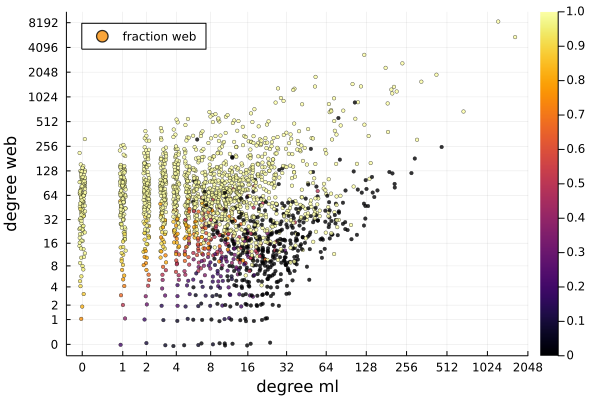

In [85]:
using Random
Random.seed!(1234)
scatter(log1pjitter.(agg_df.deg_ml),
log1pjitter.(agg_df.deg_web);
    zcolor=agg_df.web_mean, xlabel="degree ml", ylabel="degree web",
    markersize=2, markerstrokewidth=0.5, markeralpha=0.8, legend=:topleft, labels="fraction web",
    xticks=gen_ticks(maximum(classes_df.deg_ml)), yticks=gen_ticks(maximum(classes_df.deg_web)))

## Fitting a logistic regression model predicting developer type

In [86]:
using GLM
glm(@formula(ml_target~log1p(deg_ml)+log1p(deg_web)), classes_df, Binomial(), LogitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, LogitLink}, GLM.DensePredChol{Float64, LinearAlgebra.Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

ml_target ~ 1 + :(log1p(deg_ml)) + :(log1p(deg_web))

Coefficients:
────────────────────────────────────────────────────────────────────────────
                   Coef.  Std. Error       z  Pr(>|z|)  Lower 95%  Upper 95%
────────────────────────────────────────────────────────────────────────────
(Intercept)      0.30205   0.0288865   10.46    <1e-24   0.245433   0.358666
log1p(deg_ml)    1.80476   0.0224022   80.56    <1e-99   1.76085    1.84866
log1p(deg_web)  -1.63877   0.0208776  -78.49    <1e-99  -1.67969   -1.59785
────────────────────────────────────────────────────────────────────────────

In [87]:
@formula(ml_target~log1p(deg_ml)+log1p(deg_web))

FormulaTerm
Response:
  ml_target(unknown)
Predictors:
  (deg_ml)->log1p(deg_ml)
  (deg_web)->log1p(deg_web)

## Using the insertcols! function to mutate a data frame

In [88]:
df = DataFrame(x=1:2)

2×1 DataFrame
 Row │ x     
     │ Int64 
─────┼───────
   1 │     1
   2 │     2

In [89]:
insertcols!(df, :y => 4:5)

2×2 DataFrame
 Row │ x      y     
     │ Int64  Int64 
─────┼──────────────
   1 │     1      4
   2 │     2      5

In [90]:
insertcols!(df, :y => 4:5)

LoadError: ArgumentError: Column y is already present in the data frame which is not allowed when `makeunique=true`

In [91]:
insertcols!(df, :z => 1)

2×3 DataFrame
 Row │ x      y      z     
     │ Int64  Int64  Int64 
─────┼─────────────────────
   1 │     1      4      1
   2 │     2      5      1

In [92]:
insertcols!(df, 1, :a => 0)

2×4 DataFrame
 Row │ a      x      y      z     
     │ Int64  Int64  Int64  Int64 
─────┼────────────────────────────
   1 │     0      1      4      1
   2 │     0      2      5      1

In [93]:
insertcols!(df, :x, :pre_x => 2)

2×5 DataFrame
 Row │ a      pre_x  x      y      z     
     │ Int64  Int64  Int64  Int64  Int64 
─────┼───────────────────────────────────
   1 │     0      2      1      4      1
   2 │     0      2      2      5      1

In [94]:
insertcols!(df, :x, :post_x => 3; after=true)

2×6 DataFrame
 Row │ a      pre_x  x      post_x  y      z     
     │ Int64  Int64  Int64  Int64   Int64  Int64 
─────┼───────────────────────────────────────────
   1 │     0      2      1       3      4      1
   2 │     0      2      2       3      5      1